In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from lib.help_function import *
from lib.rank_lib import *
from lib.feature_lib import *

#DATA_PATH = './data/data.csv'

DATA_PATH = './data/data.csv'

DATA_PATH_2 = './data/LSVT_voice_rehabilitation.xlsx'

In [2]:
import numpy as np
from scipy.sparse import diags
from skfeature.utility.construct_W import construct_W


def lap_score(X, **kwargs):
    """
    This function implements the laplacian score feature selection, steps are as follows:
    1. Construct the affinity matrix W if it is not specified
    2. For the r-th feature, we define fr = X(:,r), D = diag(W*ones), ones = [1,...,1]', L = D - W
    3. Let fr_hat = fr - (fr'*D*ones)*ones/(ones'*D*ones)
    4. Laplacian score for the r-th feature is score = (fr_hat'*L*fr_hat)/(fr_hat'*D*fr_hat)

    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    kwargs: {dictionary}
        W: {sparse matrix}, shape (n_samples, n_samples)
            input affinity matrix

    Output
    ------
    score: {numpy array}, shape (n_features,)
        laplacian score for each feature

    Reference
    ---------
    He, Xiaofei et al. "Laplacian Score for Feature Selection." NIPS 2005.
    """

    # if 'W' is not specified, use the default W
    if 'W' not in kwargs.keys():
        W = construct_W(X)
    # construct the affinity matrix W
    W = kwargs['W']
    # build the diagonal D matrix from affinity matrix W
    D = np.array(W.sum(axis=1))
    L = W
    tmp = np.dot(np.transpose(D), X)
    D = diags(np.transpose(D), [0])
    Xt = np.transpose(X)
    t1 = np.transpose(np.dot(Xt, D.todense()))
    t2 = np.transpose(np.dot(Xt, L.todense()))
    # compute the numerator of Lr
    D_prime = np.array(np.sum(np.multiply(t1, X), 0)) - np.multiply(tmp, tmp)/D.sum()
    # compute the denominator of Lr
    L_prime = np.array(np.sum(np.multiply(t2, X), 0)) - np.multiply(tmp, tmp)/D.sum()
    # avoid the denominator of Lr to be 0
    D_prime[D_prime < 1e-12] = 10000

    # compute laplacian score for all features
    score = 1 - np.array(np.multiply(L_prime, 1/D_prime))[0, :]
    return np.transpose(score)


def feature_ranking(score):
    """
    Rank features in ascending order according to their laplacian scores, the smaller the laplacian score is, the more
    important the feature is
    """
    idx = np.argsort(score, 0)
    return idx



## Data preprocessing

In [14]:
#LSTV voice rehabilitation

data = pd.read_excel(DATA_PATH_2,'Data')
#data =np.array(data)
#data.head(3)

label = pd.read_excel(DATA_PATH_2,'Binary response')
#label = np.array(label)
#label = label.replace(1,0)
#label = label.replace(2,1)
#label.head(3)

In [15]:
data_label = label
data = data
data_normalize = (data- data.mean()) / (data.std())
print(np.shape(label))

label = np.squeeze(label, axis =1)
print(np.shape(label))

#print(np.shape(temp))
#temp
col_name_list = data_normalize.columns
#data_normalize.head()

(126, 1)
(126,)


In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = min_max_scaler.fit_transform(data_normalize)
data_normal_scale = pd.DataFrame(min_max_data)

data_normal_scale.columns = col_name_list
data_normal_scale.head()

temp_data_scale = min_max_scaler.fit_transform(data)
temp_data_scale = pd.DataFrame(min_max_data)
temp_data_scale.columns = col_name_list
temp_data_scale.head()


Jitter->F0_abs_dif  Jitter->F0_dif_percent  \
0            0.033021                0.030309   
1            0.068977                0.047349   
2            0.260608                0.684206   
3            0.005195                0.014441   
4            0.027197                0.027453   

   Jitter->F0_PQ5_classical_Schoentgen  Jitter->F0_PQ5_classical_Baken  \
0                             0.029885                        0.366089   
1                             0.048153                        0.427701   
2                             0.688881                        0.386061   
3                             0.014471                        0.389567   
4                             0.013318                        0.574226   

   Jitter->F0_PQ5_generalised_Schoentgen  Jitter->F0_abs0th_perturb  \
0                               0.034824                   0.008753   
1                               0.014028                   0.009366   
2                               0.619113                   0.055664   
3                               0.015053                   0.000941   
4                               0.100303                   0.003306   

   Jitter->F0_CV  Jitter->F0_TKEO_mean  Jitter->F0_TKEO_std  \
0       0.000071              0.037740             0.091154   
1       0.000082              0.089853             0.192283   
2       0.088027              0.044422             0.016357   
3       0.000014              0.000743             0.012245   
4       0.006224              0.048214             0.111263   

   Jitter->F0_TKEO_prc5          ...            det_TKEO_std4_1_coef  \
0              0.989590          ...                        0.449996   
1              0.963673          ...                        0.635807   
2              0.928397          ...                        0.023461   
3              0.999033          ...                        0.137878   
4              0.995374          ...                        0.405954   

   det_TKEO_std4_2_coef  det_TKEO_std4_3_coef  det_TKEO_std4_4_coef  \
0              0.445992              0.446291              0.447718   
1              0.634083              0.633573              0.634728   
2              0.020355              0.016936              0.006940   
3              0.132955              0.130841              0.127759   
4              0.406447              0.397706              0.402240   

   det_TKEO_std4_5_coef  det_TKEO_std4_6_coef  det_TKEO_std4_7_coef  \
0              0.443378              0.448639              0.447248   
1              0.633459              0.635146              0.636258   
2              0.000000              0.000000              0.000000   
3              0.121730              0.128634              0.129459   
4              0.396841              0.401573              0.401064   

   det_TKEO_std4_8_coef  det_TKEO_std4_9_coef  det_TKEO_std4_10_coef  
0              0.446953              0.464189               0.472513  
1              0.636462              0.648218               0.652997  
2              0.000000              0.031096               0.040043  
3              0.129326              0.155887               0.168257  
4              0.400494              0.419376               0.427514  

[5 rows x 310 columns]

In [36]:
data = pd.read_csv(DATA_PATH)


In [40]:
data = pd.read_csv(DATA_PATH)
y = data.diagnosis
temp_list = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(temp_list, axis =1)

print(np.shape(y))
y

(569,)


0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [28]:
data_label = y
data = x
data_normalize = (data- data.mean()) / (data.std())

col_name_list = data_normalize.columns
data_normalize.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   fractal_dimension_mean           ...             radius_worst  \
0                2.253764           ...                 1.885031   
1               -0.867889           ...                 1.804340   
2               -0.397658           ...                 1.510541   
3                4.906602           ...                -0.281217   
4               -0.561956           ...                 1.297434   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0      -1.358098         2.301575    1.999478          1.306537   
1      -0.368879         1.533776    1.888827         -0.375282   
2      -0.023953         1.346291    1.455004          0.526944   
3       0.133866        -0.249720   -0.549538          3.391291   
4      -1.465481         1.337363    1.219651          0.220362   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           2.614365         2.107672              2.294058        2.748204   
1          -0.430066        -0.146620              1.086129       -0.243675   
2           1.081980         0.854222              1.953282        1.151242   
3           3.889975         1.987839              2.173873        6.040726   
4          -0.313119         0.612640              0.728618       -0.867590   

   fractal_dimension_worst  
0                 1.935312  
1                 0.280943  
2                 0.201214  
3                 4.930672  
4                -0.396751  

[5 rows x 30 columns]

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = min_max_scaler.fit_transform(data_normalize)
data_normal_scale = pd.DataFrame(min_max_data)

data_normal_scale.columns = col_name_list
data_normal_scale.head()

temp_data_scale = min_max_scaler.fit_transform(data)
temp_data_scale = pd.DataFrame(min_max_data)
temp_data_scale.columns = col_name_list
temp_data_scale.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean           ...             radius_worst  \
0                0.605518           ...                 0.620776   
1                0.141323           ...                 0.606901   
2                0.211247           ...                 0.556386   
3                1.000000           ...                 0.248310   
4                0.186816           ...                 0.519744   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0       0.141525         0.668310    0.450698          0.601136   
1       0.303571         0.539818    0.435214          0.347553   
2       0.360075         0.508442    0.374508          0.483590   
3       0.385928         0.241347    0.094008          0.915472   
4       0.123934         0.506948    0.341575          0.437364   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           0.619292         0.568610              0.912027        0.598462   
1           0.154563         0.192971              0.639175        0.233590   
2           0.385375         0.359744              0.835052        0.403706   
3           0.814012         0.548642              0.884880        1.000000   
4           0.172415         0.319489              0.558419        0.157500   

   fractal_dimension_worst  
0                 0.418864  
1                 0.222878  
2                 0.213433  
3                 0.773711  
4                 0.142595  

[5 rows x 30 columns]

In [25]:
score = pd.Series(fisher_score.fisher_score(np.array(data), label),index=data.columns)


IndexError: invalid index shape

In [61]:
print(np.shape(data_label))
print(np.shape(np.array(data_label)))

print(np.shape(data_normal_scale)[1])

(126, 1)
(126, 1)
310


## Ranking system

In [17]:
print(np.shape(data_normal_scale))
print(np.shape(label))

chi_score_list_raw,chi_rank = get_chi_score(data_normal_scale,label)
temp1,fisher_rank =get_fisher_score(data_normal_scale,label)
temp2,lap_rank=get_lap_score(data_normal_scale)

#chi_score_list_raw,chi_rank = get_chi_score(data,data_label)
#temp1,fisher_rank =get_fisher_score(data_normal_scale,y)
#temp2,lap_rank=get_lap_score(data_normal_scale)

final_rank,final_result = get_feature_ranking(data_normal_scale, chi_rank,fisher_rank,lap_rank)

(126, 310)
(126,)
                                    Feature   ranking
89                            MFCC_6th coef  1.862069
96                         delta log energy  1.482759
105                               8th delta  1.379310
106                               9th delta  1.379310
101                               4th delta  1.275862
116                         5th delta-delta  1.241379
92                            MFCC_9th coef  1.172414
45                   Shimmer->Ampl_TKEO_std  1.000000
59                                      DFA  1.000000
30                    Shimmer->Ampl_abs_dif  0.965517
72                            VFER->SNR_SEO  0.965517
119                         8th delta-delta  0.965517
79                             IMF->NSR_SEO  0.931034
17   Jitter->pitch_PQ5_classical_Schoentgen  0.896552
88                            MFCC_5th coef  0.896552
16                    Jitter->pitch_percent  0.862069
122                        11th delta-delta  0.862069
23        

In [9]:
rawdata = pd.read_csv('./data/parkinson_disease_speech.csv',header=1)

data = rawdata.iloc[:,2:-1]

label = rawdata['class']

data_scaled = (data-data.min())/(data.max()-data.min())
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W(data_scaled, **kwargs_W)
score = pd.Series(lap_score(data_scaled,W=W),index=data.columns)


In [8]:
print(len(data.columns))


310


AttributeError: 'DataFrame' object has no attribute 'rows'

## Feature Selection Method  
- Random selection  
- Maxmin selection  
- Cluster selection

### Random selection

In [11]:
def plot_random_model_acc2(model_list,model_mean_acc_list,
                          model_std_list,file_name ='random_output',save_folder = 'result',fig_size = (12,12)):
    
    if os.path.isdir('./'+save_folder) == False:
        os.mkdir('./'+save_folder)
    else:
        print('already exist the folder in this path : {}'.format('./'+save_folder))
        
    f1 = plt.figure(figsize=fig_size)
    plt.xlabel('number of feature')
    plt.ylabel('acc')
    
    idx = 0
    for name,_ in model_list:
        #print(name)
        plt.plot(range(len(model_mean_acc_list)), model_mean_acc_list[:,[idx]],label = name)        
        idx = idx+1
          
    plt.legend()
    f1.savefig('./'+save_folder + '/'+file_name+'.png')
    
    f2 = plt.figure(figsize=fig_size)
    plt.xlabel('number of feature')
    plt.ylabel('acc')
    
    plt.ylim((0.0,1.0))
    idx = 0
    for name,_ in model_list:
        #print(name)
        plt.plot(range(len(model_mean_acc_list)), model_mean_acc_list[:,[idx]],label = name)
        idx = idx+1
        
        
    plt.legend()
    f2.savefig('./'+save_folder + '/'+file_name+'_0to1'+'.png')

In [9]:
#random_model_list, random_mean_result, random_std_result = feature_random_test(data_normal_scale, y,num_iter=10)
random_model_list, random_mean_result, random_std_result = feature_random_test(data, label,num_iter=10)


Number of feature and iter num :  310
[Number of Feature] :  0


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d 

[Number of Feature] :  1


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  2


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  3


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  4


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  5


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  6


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  7


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  8


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d 

[Number of Feature] :  9


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  10


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  11


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  12


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1

[Number of Feature] :  13


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  14


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  15


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  16


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  17


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  18


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  19


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  20


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  21


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  22


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  23


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  24


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  25


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  26


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  27


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  28


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  29


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  30


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  31


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  32


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  33


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  34


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  35


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  36


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  37


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  38


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  39


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  40


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  41


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  42


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  43


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  44


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  45


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  46


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  47


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  48


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  49


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  50


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1

[Number of Feature] :  51


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1

[Number of Feature] :  52


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  53


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  54


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  55


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d 

[Number of Feature] :  56


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  57


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  58


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  59


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  60


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  61


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  62


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  63


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  64


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  65


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  66


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  67


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  68


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1

[Number of Feature] :  69


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  70


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d 

[Number of Feature] :  71


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  72


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  73


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  74


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  75


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  76


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d 

[Number of Feature] :  77


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  78


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  79


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  80


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d 

[Number of Feature] :  81


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  82


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  83


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  84


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d 

[Number of Feature] :  85


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  86


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  87


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  88


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  89


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  90


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  91


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was pa

[Number of Feature] :  92


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  93


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  94


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  95


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  96


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  97


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  98


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  99


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  100


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  101


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  102


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  103


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  104


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  105


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  106


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  107


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  108


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  109


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  110


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  111


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  112


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  113


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  114


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  115


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  116


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  117


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  118


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  119


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  120


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  121


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  122


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  123


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  124


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  125


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  126


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  127


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  128


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  129


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  130


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  131


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  132


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  133


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  134


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  135


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  136


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  137


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  138


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  139


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  140


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  141


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  142


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  143


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  144


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  145


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  146


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  147


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  148


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  149


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  150


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  151


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  152


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  153


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  154


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  155


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  156


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  157


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  158


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  159


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  160


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  161


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  162


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  163


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  164


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  165


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  166


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  167


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  168


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  169


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  170


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  171


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  172


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  173


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  174


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  175


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  176


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  177


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  178


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  179


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  180


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  181


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  182


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  183


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  184


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  185


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  186


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  187


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  188


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  189


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  190


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  191


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  192


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  193


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  194


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  195


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  196


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  197


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  198


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  199


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  200


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  201


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  202


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  203


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  204


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  205


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  206


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  207


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  208


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  209


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  210


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  211


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  212


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  213


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  214


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  215


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  216


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  217


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  218


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  219


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  220


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  221


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  222


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  223


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  224


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  225


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  226


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  227


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  228


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  229


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  230


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  231


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  232


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  233


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  234


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  235


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  236


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  237


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  238


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  239


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  240


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  241


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  242


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  243


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  244


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  245


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  246


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  247


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  248


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  249


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  250


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  251


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  252


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  253


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  254


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  255


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  256


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  257


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  258


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  259


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1

[Number of Feature] :  260


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  261


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  262


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  263


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  264


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  265


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  266


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  267


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  268


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  269


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  270


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  271


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  272


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  273


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  274


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  275


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  276


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  277


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  278


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  279


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  280


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  281


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  282


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  283


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  284


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  285


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  286


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  287


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  288


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  289


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  290


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  291


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  292


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  293


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  294


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  295


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  296


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  297


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  298


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validat

[Number of Feature] :  299


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  300


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  301


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  302


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  303


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  304


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  305


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  306


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

[Number of Feature] :  307


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  308


/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:15

[Number of Feature] :  309


/home/bono/Desktop/mellab_project/bono_hw/icim_5th_academy/lib/feature_lib.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bono/.pyenv/versions/3.5.5/envs/gpuTest/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A col

already exist the folder in this path : ./result


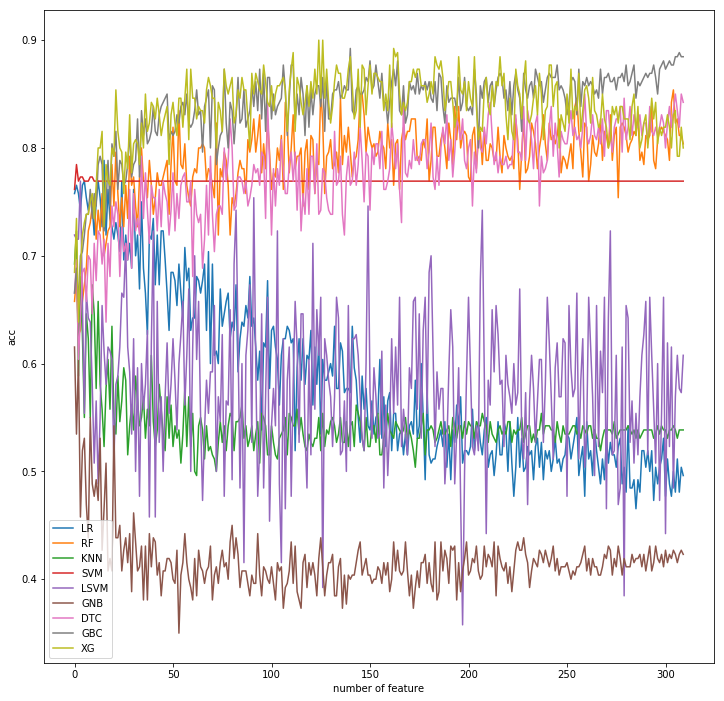

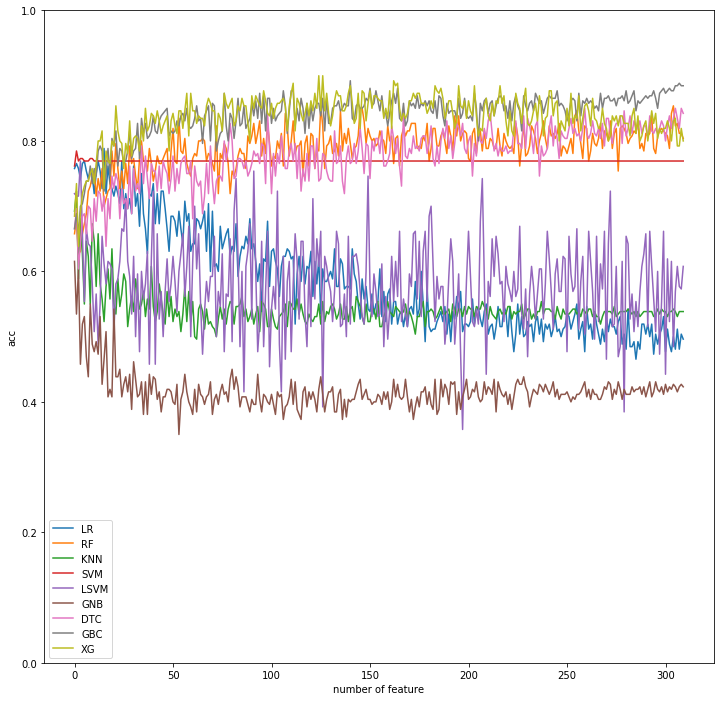

In [10]:
plot_random_model_acc(random_model_list,random_mean_result , random_std_result)

already exist the folder in this path : ./result


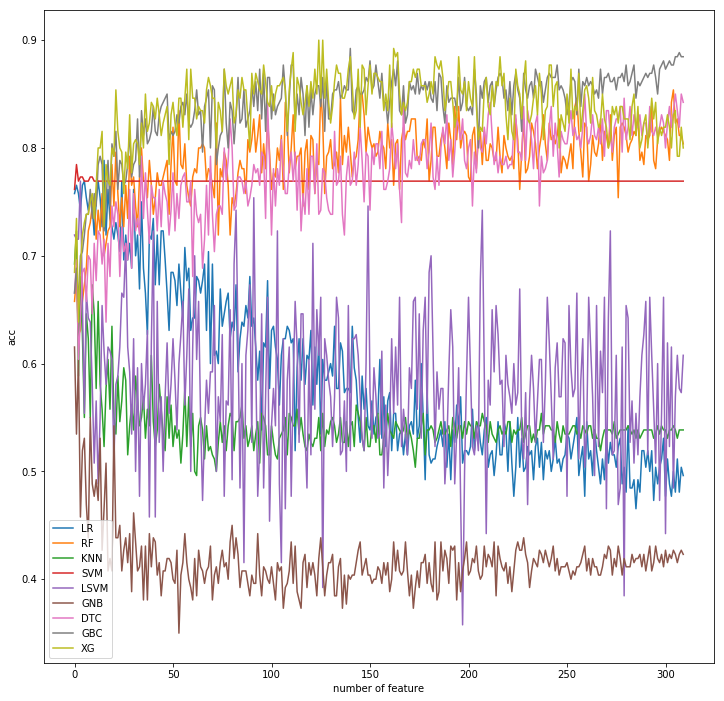

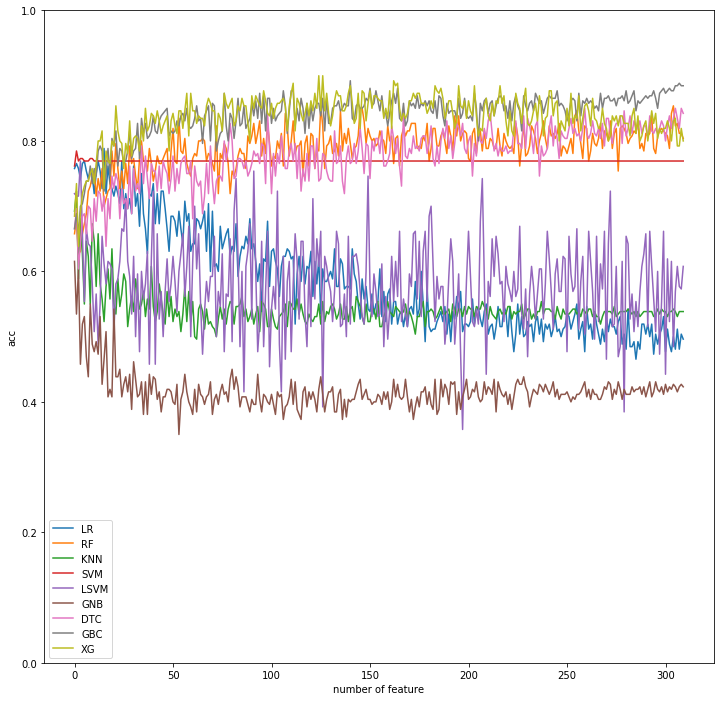

In [12]:
plot_random_model_acc2(random_model_list,random_mean_result , random_std_result)

### Maxmin selection

In [18]:

select_feature_list = maxmin_selector(data_normal_scale,10,'MFCC_6th coef')

print(select_feature_list)

['MFCC_6th coef', 'MFCC_4th coef', 'IMF->NSR_TKEO', 'MFCC_0th coef', 'entropy_shannon3_5_coef', 'entropy_log3_8_coef', 'Ea', '3rd delta-delta', 'delta delta log energy', '3rd delta']


In [20]:
target_feature_top_5 = final_result[0:5]
target_feature_bottom_5 = final_result[-6 : -1]

#print(target_feature_bottom_5)

for feature_name in target_feature_top_5['Feature']:
    target_feature = feature_name
    model_list, acc_list = feature_maxmin_test(data_normal_scale,label,target_feature)
    plot_model_acc(model_list,acc_list,'top_'+target_feature)
    
for feature_name in target_feature_bottom_5['Feature']:
    target_feature = feature_name
    model_list, acc_list = feature_maxmin_test(data_normal_scale,label,target_feature)
    plot_model_acc(model_list,acc_list,'bottom_'+target_feature)

/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bono/.pyenv/version

ValueError: feature_names must be unique

### Cluster selection

In [10]:
from sklearn.manifold import MDS

embedding = MDS(dissimilarity='precomputed')
mds_f = embedding.fit_transform(np.arccos(np.corrcoef(data.values.T)))

temp = 0
while temp != 30:
    cluster_dic = get_cluster_output(mds_f,col_name_list)
    temp = len(cluster_dic)
    print(temp)

30


In [11]:

final_cluster_result = np.zeros((30,9))

for i in range(30):
    cluster_list = get_in_cluster_ranking(final_result, cluster_dic[i+1])
    data_clusterd = data_normal_scale[cluster_list]
    model_cluster_list, acc_cluster_list = feature_cluster_test(data_clusterd,y)
    #print(acc_cluster_list)
    
    final_cluster_result[i] = np.asarray(acc_cluster_list)

/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bono/.pyenv/versions/3.6.5/envs/math_camp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

already exist the folder in this path : ./result


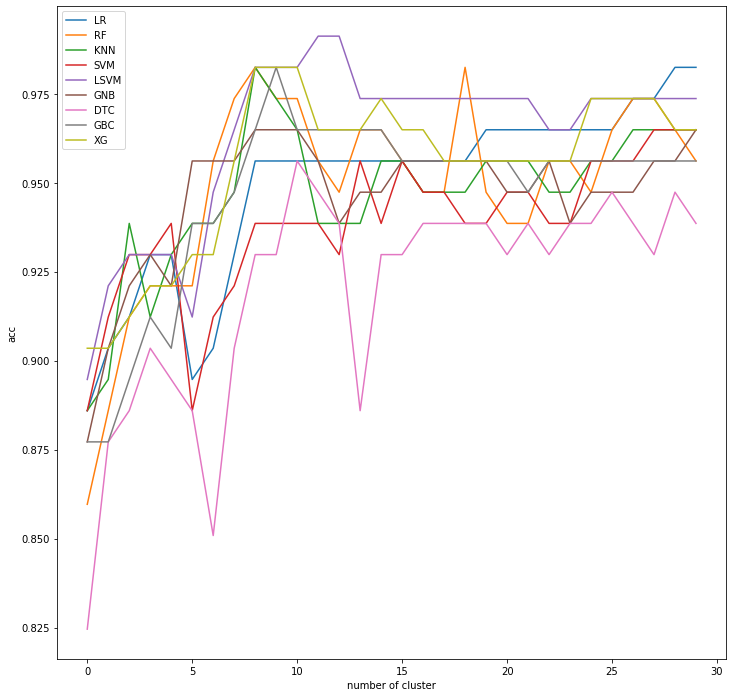

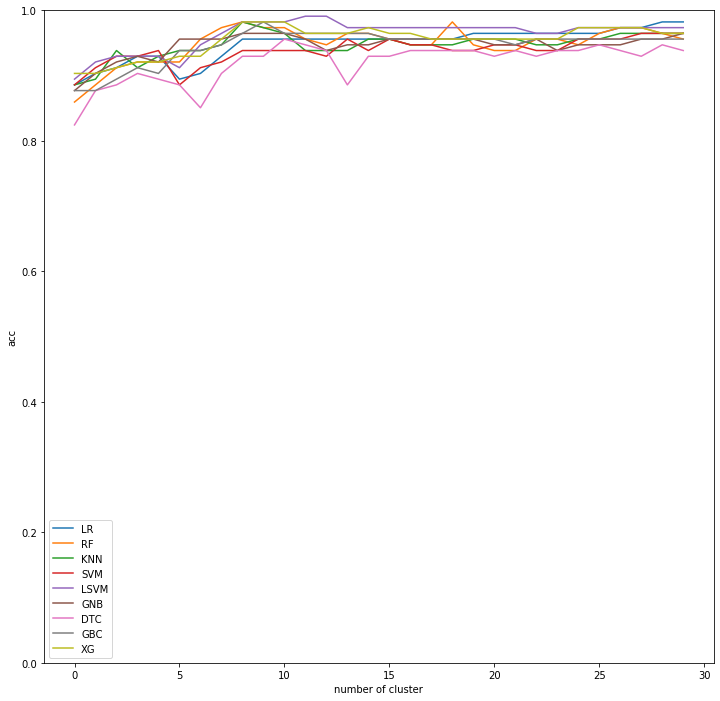

In [12]:
plot_cluster_model_acc(random_model_list,final_cluster_result)